In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import sklearn 
import numpy as np
from fbprophet import Prophet

%matplotlib inline


In [2]:
import datetime as dt

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")


In [3]:
def load_data():
    url = "./avocado.csv"
    return pd.read_csv(url)

In [4]:
df = load_data()

In [5]:
original_df = df

In [6]:
PREDICTION_TYPE = 'conventional'
df = df[df.type == PREDICTION_TYPE]

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

/Users/syedmeesumalizaidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
df = df.sort_values(by=["Date"])

In [9]:
df = df.loc[df.loc[:,"region"].isin(["California"])]

In [10]:
df = df.loc[:,["Date","AveragePrice"]]

In [11]:
df.index = np.arange(len(df))

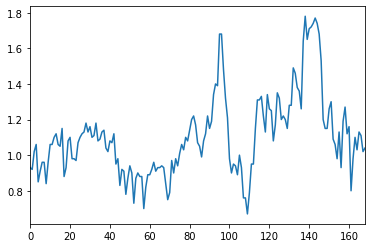

In [12]:
df.AveragePrice.plot()

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
import statsmodels.api as sm


In [15]:
from matplotlib import pyplot


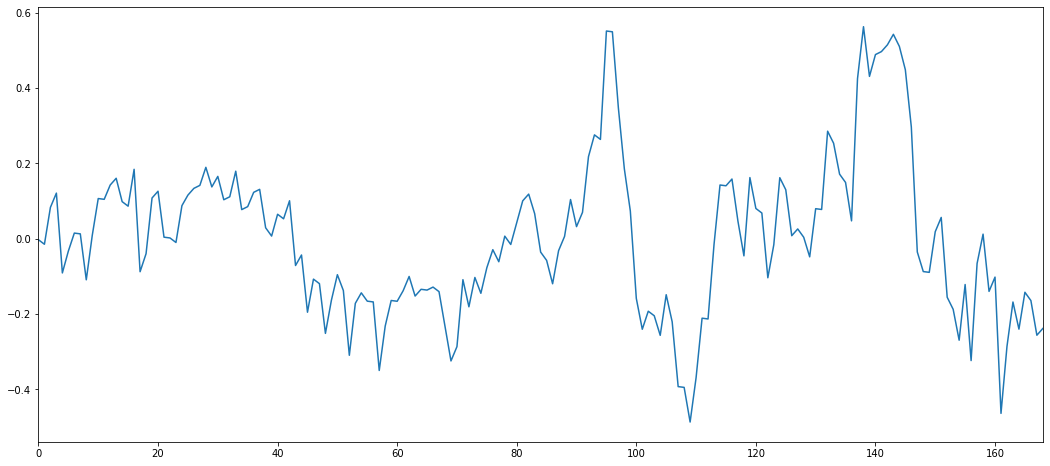

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.detrend(df.AveragePrice)
fig = decomposition.plot()
plt.show()

In [17]:
df_train = df.iloc[0:134]

In [18]:
df_test = df.iloc[135:]

In [19]:
df_test.index = np.arange(len(df_test))

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 2 columns):
Date            34 non-null datetime64[ns]
AveragePrice    34 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 816.0 bytes


                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  133
Model:                 ARIMA(6, 1, 1)   Log Likelihood                 127.077
Method:                       css-mle   S.D. of innovations              0.092
Date:                Fri, 01 May 2020   AIC                           -236.155
Time:                        13:42:11   BIC                           -210.142
Sample:                             1   HQIC                          -225.584
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0022      0.001      1.925      0.057   -3.97e-05       0.004
ar.L1.D.AveragePrice     0.8908      0.087     10.288      0.000       0.721       1.061
ar.L2.D.Aver

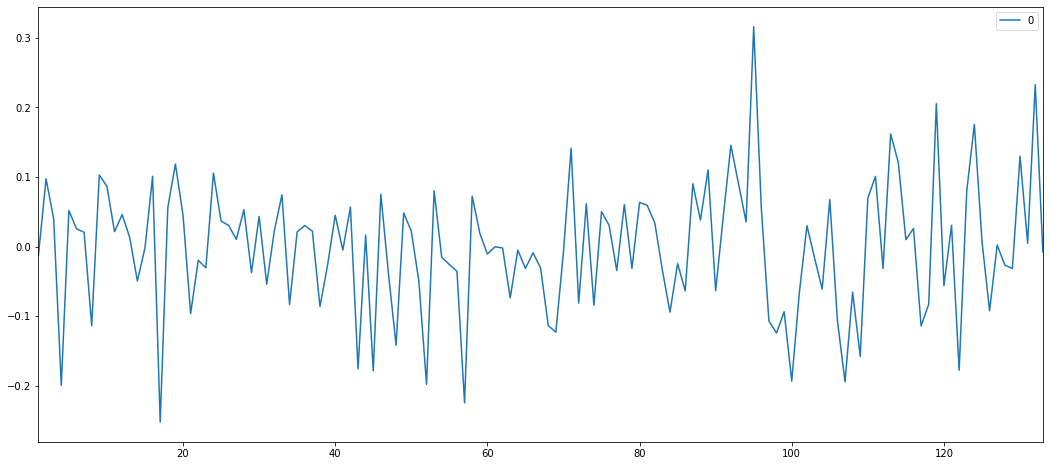

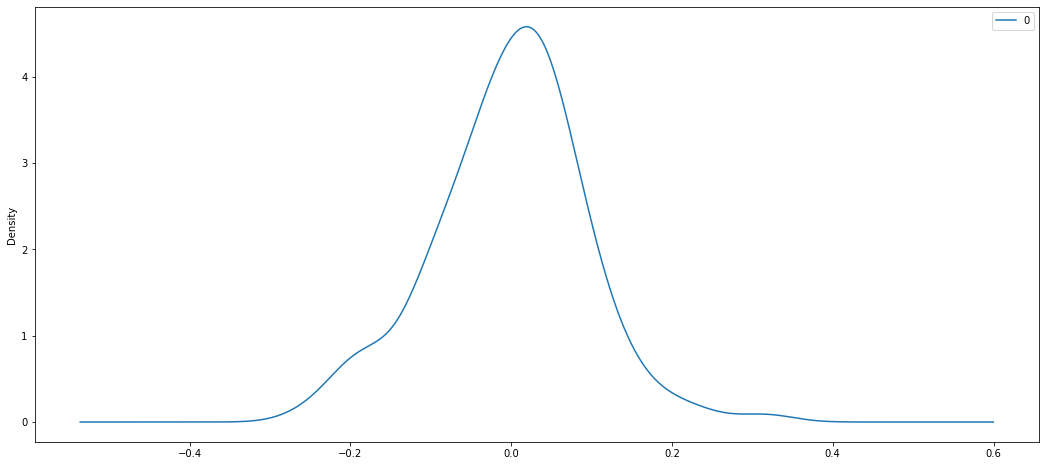

                0
count  133.000000
mean    -0.002129
std      0.093299
min     -0.252019
25%     -0.056074
50%      0.004706
75%      0.052942
max      0.315834


In [21]:
# fit model
model = sm.tsa.ARIMA(df_train.AveragePrice, order=(6,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

[1.42030922 1.40748629 1.38536608 1.3499895  1.32357276 1.30351804
 1.28534606 1.27086781 1.2607268  1.25345408 1.24839163 1.24534663
 1.2438445  1.24343072 1.24384368 1.24487237 1.24632471 1.2480653
 1.25000236 1.25206593 1.25420581 1.25638941 1.2585953  1.26080947
 1.26302361 1.26523329 1.26743641 1.26963235 1.27182138 1.27400426
 1.27618188 1.27835519 1.28052507 1.28269229]


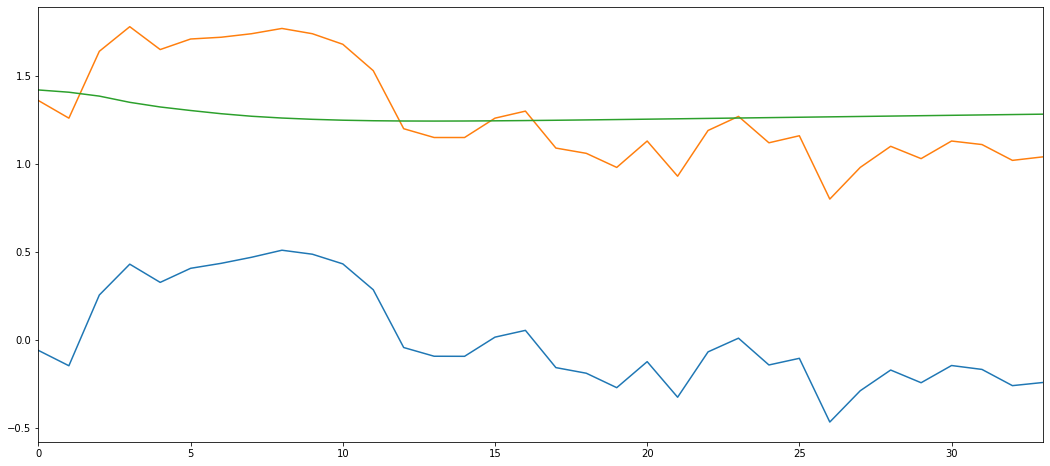

In [22]:
arima_forecast = model_fit.forecast(34)
print(arima_forecast[0])
arima_residuals = df_test.AveragePrice - arima_forecast[0]
arima_residuals.plot()
df_test.AveragePrice.plot()
plt.plot(arima_forecast[0])

                           Statespace Model Results                           
Dep. Variable:           AveragePrice   No. Observations:                  134
Model:               SARIMAX(5, 1, 1)   Log Likelihood                 125.853
Date:                Fri, 01 May 2020   AIC                           -237.706
Time:                        14:00:10   BIC                           -217.473
Sample:                             0   HQIC                          -229.484
                                - 134                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8896      0.113      7.858      0.000       0.668       1.111
ar.L2         -0.0858      0.126     -0.683      0.495      -0.332       0.160
ar.L3          0.1335      0.120      1.111      0.2

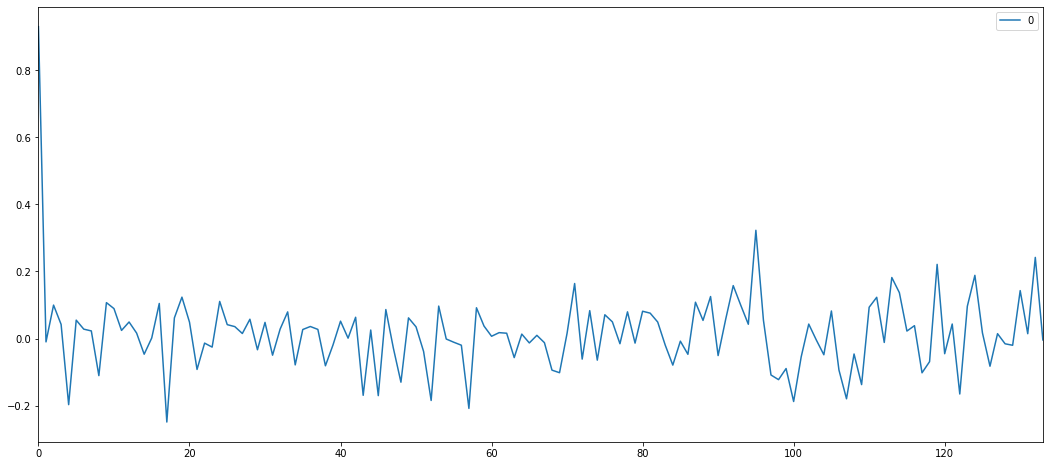

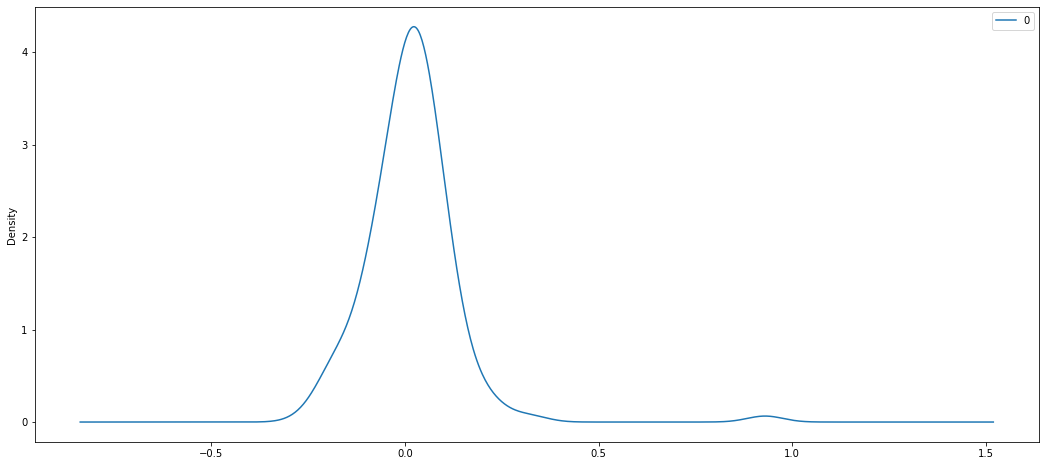

                0
count  134.000000
mean     0.015784
std      0.122751
min     -0.249039
25%     -0.046613
50%      0.015999
75%      0.061569
max      0.930000


In [79]:
model_sarimax = sm.tsa.SARIMAX(df_train.AveragePrice, order=(5,1,1))
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())
# plot residual errors
residuals_sarimax = pd.DataFrame(model_sarimax_fit.resid)
residuals_sarimax.plot()
pyplot.show()
residuals_sarimax.plot(kind='kde')
pyplot.show()
print(residuals_sarimax.describe())

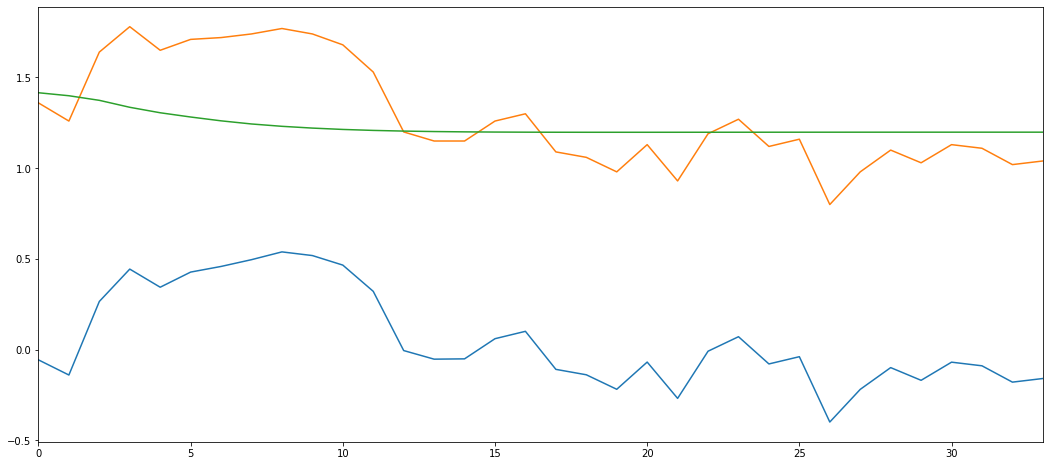

In [80]:
sarimax_forecast = model_sarimax_fit.forecast(34)
sarimax_forecast.index = np.arange(len(df_test))

sarimax_residuals = df_test.AveragePrice - sarimax_forecast

sarimax_residuals.plot()
df_test.AveragePrice.plot()
plt.plot(sarimax_forecast)

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   34
Model:             ExponentialSmoothing   SSE                              0.747
Optimized:                         True   AIC                           -125.819
Trend:                             None   BIC                           -122.766
Seasonal:                          None   AICC                          -124.439
Seasonal Periods:                  None   Date:                 Fri, 01 May 2020
Box-Cox:                          False   Time:                         13:55:13
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8592633                alpha                 True
initial_level              1.35379

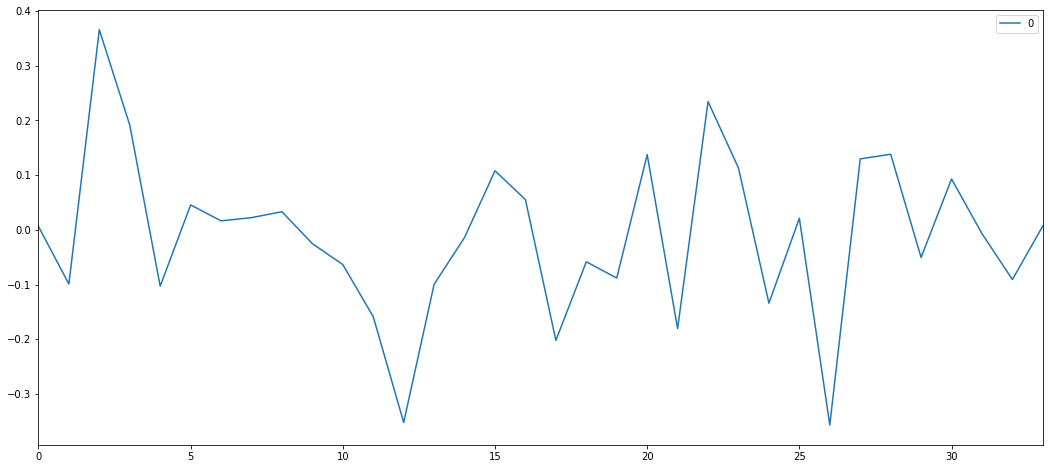

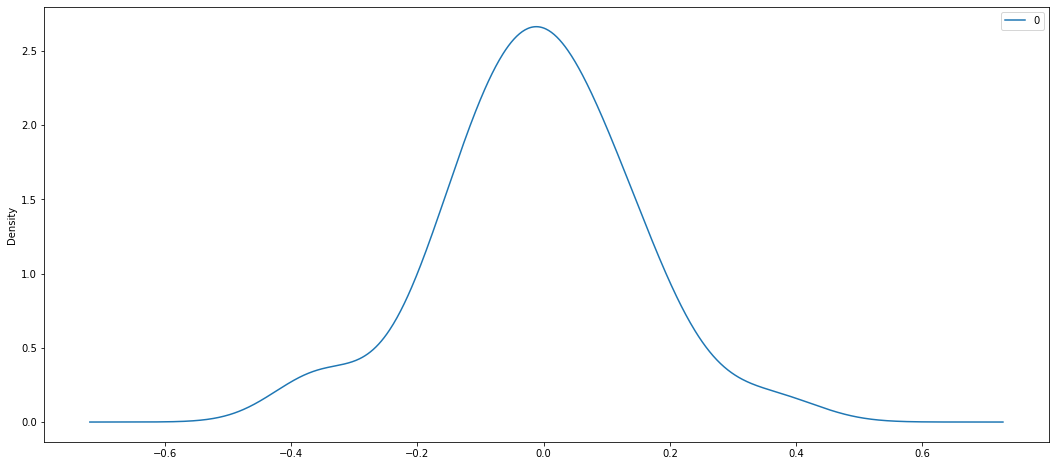

               0
count  34.000000
mean   -0.010776
std     0.150045
min    -0.357027
25%    -0.097089
50%    -0.000362
75%     0.083466
max     0.366049


In [49]:
# fit model
model_exp = sm.tsa.ExponentialSmoothing(df_test.AveragePrice)
model_exp_fit = model_exp.fit()
print(model_exp_fit.summary())
# plot residual errors
residuals_exp = pd.DataFrame(model_exp_fit.resid)
residuals_exp.plot()
pyplot.show()
residuals_exp.plot(kind='kde')
pyplot.show()
print(residuals_exp.describe())

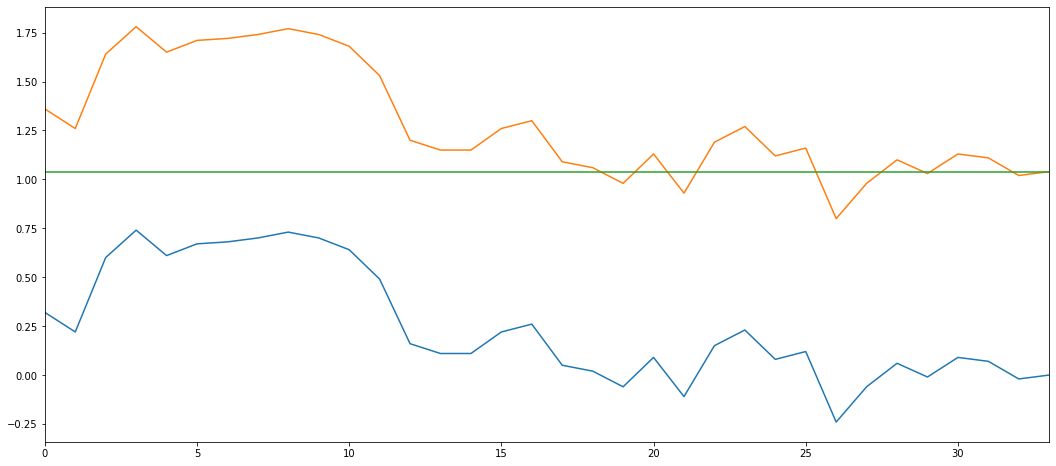

In [51]:
exp_forecast = model_exp_fit.forecast(34)
exp_forecast.index = np.arange(len(df_test))
exp_residuals = df_test.AveragePrice - exp_forecast
exp_residuals.plot()
df_test.AveragePrice.plot()
plt.plot(exp_forecast)

In [96]:
# fit model
model_markov = sm.tsa.MarkovAutoregression(df_test.AveragePrice,k_regimes=2,order=1)
model_markov_fit = model_markov.fit()
print(model_markov_fit.summary())

                         Markov Switching Model Results                         
Dep. Variable:             AveragePrice   No. Observations:                   33
Model:             MarkovAutoregression   Log Likelihood                  16.467
Date:                  Fri, 01 May 2020   AIC                            -18.935
Time:                          14:08:43   BIC                             -8.459
Sample:                               0   HQIC                           -15.410
                                   - 33                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9026    184.704      0.005      0.996    -361.110     362.915
ar.L1          0.0678   4328.878   1

In [133]:
forecastDict = {"arima":arima_forecast[0],
                "sarimax":sarimax_forecast,
                "exponential":exp_forecast}

In [136]:
forecast_df = pd.DataFrame(forecastDict)

In [138]:
residualaDict = {"arima":arima_residuals,
                "sarimax":sarimax_residuals,
                "exponential":exp_residuals}

In [139]:
residuals_df = pd.DataFrame(residualaDict)

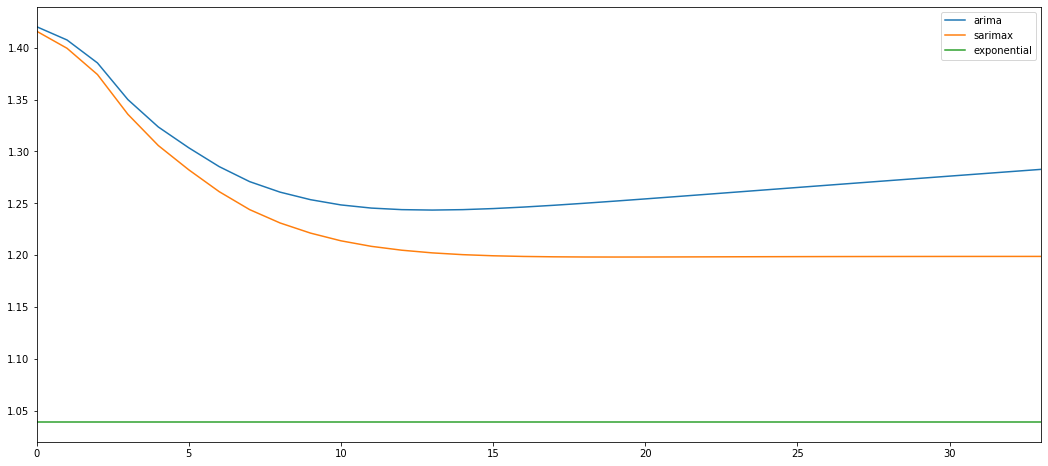

In [143]:
forecast_df.plot()

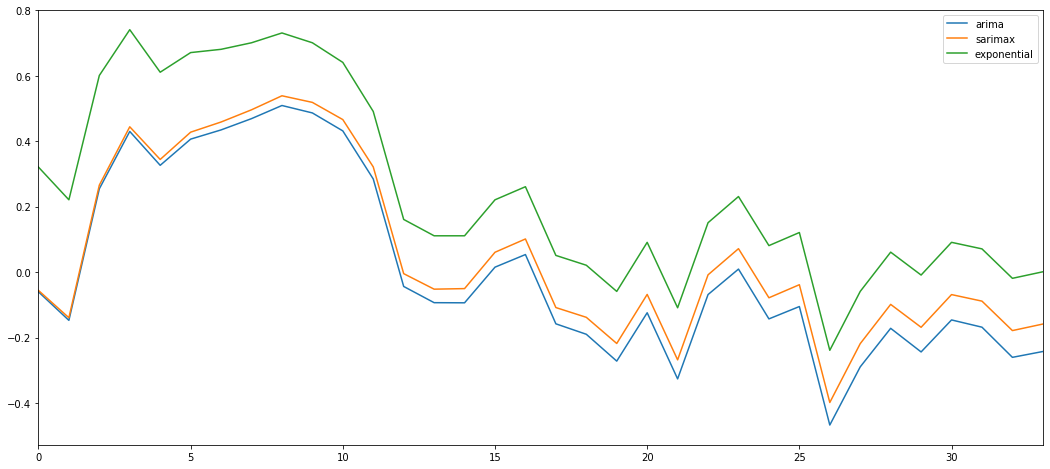

In [141]:
residuals_df.plot()

In [150]:
from dm_test import dm_test

In [151]:
rt = dm_test(df_test.AveragePrice,arima_forecast[0],sarimax_forecast,h = 1, crit="MAD")
print(rt)
rt = dm_test(df_test.AveragePrice,arima_forecast[0],sarimax_forecast,h = 1, crit="MSE")
print(rt)
rt = dm_test(df_test.AveragePrice,arima_forecast[0],sarimax_forecast,h = 1, crit="poly", power=4)
print(rt)

dm_return(DM=2.890707218778069, p_value=0.006748528112387321)
dm_return(DM=1.3140292041308677, p_value=0.19789784791361076)
dm_return(DM=-0.8708448631547725, p_value=0.3901301237753515)


In [152]:
rt = dm_test(df_test.AveragePrice,arima_forecast[0],exp_forecast,h = 1, crit="MAD")
print(rt)
rt = dm_test(df_test.AveragePrice,arima_forecast[0],exp_forecast,h = 1, crit="MSE")
print(rt)
rt = dm_test(df_test.AveragePrice,arima_forecast[0],exp_forecast,h = 1, crit="poly", power=4)
print(rt)

dm_return(DM=-1.3256833094569014, p_value=0.1940489882870104)
dm_return(DM=-2.7558007047956585, p_value=0.009458720373843757)
dm_return(DM=-3.255731851964438, p_value=0.0026169048746060098)


In [154]:
rt = dm_test(df_test.AveragePrice,sarimax_forecast,exp_forecast,h = 1, crit="MAD")
print(rt)
rt = dm_test(df_test.AveragePrice,sarimax_forecast,exp_forecast,h = 1, crit="MSE")
print(rt)
rt = dm_test(df_test.AveragePrice,sarimax_forecast,exp_forecast,h = 1, crit="poly", power=4)
print(rt)

dm_return(DM=-2.5480147459548235, p_value=0.015674392284335342)
dm_return(DM=-3.4331493752109754, p_value=0.0016255902636877085)
dm_return(DM=-3.394280105546634, p_value=0.0018057399485397706)
